<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Neuropixels Extracellular Electrophysiology </h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Wednesday, August 22, 2018</h3> 

<img src="../resources/EphysObservatory/neuropixels.png" height="250" width="250"> 

# EcephysSession

In [9]:
# first we need a bit of import boilerplate
import os

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys.ecephys_session import EcephysSession, removed_unused_stimulus_presentation_columns
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed

# slow autocomplete
%config Completer.use_jedi = False

In [1]:
manifest_path = os.path.join('/local1/storage/allensdk_cache/example_ecephys_project_cache', 'manifest.json')

cache = EcephysProjectCache.from_lims(
    manifest=manifest_path,
    lims_kwargs={
        "pg_kwargs": {
            "dbname": "lims2_nileg",
            "host": "aibsdc-dev-db1",
            "port": 5432,
            "user": "limsreader",
            "password": "limsro"
        },
        "app_kwargs": {
            "host": "axon:4000"
        }
    }
)

In [2]:
cache.get_sessions().head()

,Unnamed: 0,name,stimulus_name,storage_directory,workflow_state,specimen_id,isi_experiment_id,equipment_id,operator_id,qc_operator_id,project_id,eye_tracking_id,observatory_stimulus_config_id,date_of_acquisition,created_at,updated_at,temp_upload_directory,published_at,habituation
id,,,,,,,,,,,,,,,,,,,
715093703,0,20180627130420_704511589,NaN,/allen/scratch/aibstemp/nileg/stable_lims/alle...,uploaded,699733581,705968051,677098837.0,704511589,NaN,714914585,NaN,NaN,2019-01-19 08:54:18.922676,2018-06-27 20:04:20.395055,2019-07-08 19:59:28.611940,//allen/programs/braintv/production/incoming/n...,NaN,False
719161530,1,20180712113119_704511589,NaN,/allen/scratch/aibstemp/nileg/stable_lims/alle...,uploaded,703279284,712195349,677098837.0,704511589,NaN,714914585,NaN,NaN,2019-01-09 00:25:16.998330,2018-07-12 18:31:20.070088,2019-07-08 19:59:29.306724,//allen/programs/braintv/production/incoming/n...,NaN,False
721123822,2,20180718101329_678711844,NaN,/allen/scratch/aibstemp/nileg/stable_lims/alle...,uploaded,707296982,715336286,677098837.0,678711844,NaN,714914585,NaN,NaN,2019-01-09 00:25:35.372735,2018-07-18 17:13:29.331633,2019-07-08 19:59:29.401271,//allen/programs/braintv/production/incoming/n...,2019-05-28,False
728680079,3,20180801130102_678711844,NaN,/allen/scratch/aibstemp/nileg/stable_lims/alle...,uploaded,714089558,718689862,677098837.0,678711844,NaN,714914585,NaN,NaN,2019-01-09 00:25:55.679484,2018-08-01 20:01:02.947174,2019-07-08 19:59:30.018183,//allen/programs/braintv/production/incoming/n...,NaN,False
729090175,4,20180802111111_678711844,NaN,/allen/scratch/aibstemp/nileg/stable_lims/alle...,uploaded,715075382,718689865,677098837.0,678711844,NaN,714914585,NaN,NaN,2018-08-02 19:00:00.000000,2019-01-08 23:55:36.632591,2019-07-08 19:59:30.073501,//allen/programs/braintv/production/incoming/n...,NaN,False


In [3]:
# This will use a session object from earlier portions. 
session_id = 797828357 # for example
session = cache.get_session_data(session_id)

> /home/tom.chartrand/work/AllenSDK/allensdk/brain_observatory/ecephys/ecephys_project_cache.py(90)get_session_data()
-> session_api = EcephysNwbSessionApi(path=path, probe_lfp_paths=probe_promises)
(Pdb) c


Load an xarray DataArray with LFP data from channels on a single probe

In [4]:
session.probes

,description,location,sampling_rate
id,,,
805579734,probeA,,30000.0
805579738,probeB,,30000.0
805579741,probeC,,30000.0
805579745,probeD,,30000.0
805579749,probeE,,30000.0
805579753,probeF,,30000.0


In [6]:
probe_id = 805579734
lfp = session.get_lfp(probe_id)

### Generate time axis

In [13]:
lfp

<xarray.DataArray (time: 13144750, channel: 95)>
array([[  -8,    0,  -73, ...,   30,  -19,  -14],
       [-151, -215, -262, ...,  100,   -4, -216],
       [-386, -274, -405, ...,   80,   66, -223],
       ...,
       [ 204,  928,  371, ..., -131,  155,  -37],
       [ 310,  963,  351, ..., -149,   67,   23],
       [ 216,  514,  250, ...,  -39,   82,  -48]], dtype=int16)
Coordinates:
  * time     (time) float64 3.664 3.665 3.666 ... 1.052e+04 1.052e+04 1.052e+04
  * channel  (channel) int64 849856760 849856768 ... 849857504 849857512

In [16]:
lfp.time.max()

<xarray.DataArray 'time' ()>
array(10519.47572)

We'll pull out a single channel of voltage, and convert the time into a raw numpy array:

In [27]:
v = lfp[{"channel": 0}]
t = lfp.time.values

# 1. Plot time series

(5, 15)

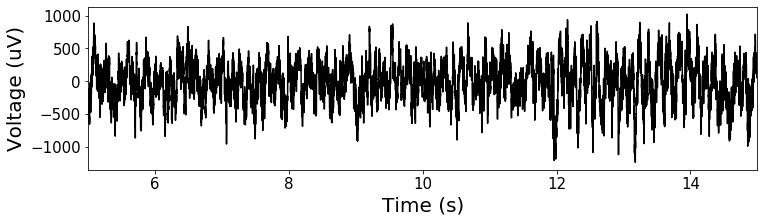

In [36]:
plt.figure(figsize=(12,3))

t_plot = [5, 15]
t_plot_idx = np.where(np.logical_and(t>=t_plot[0],t<t_plot[1]))[0]
plt.plot(t[t_plot_idx], v[t_plot_idx],'k')

# Plot details
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)
plt.xlim((t_plot))

# 2. Power spectral density (PSD)

In [24]:
# Calculate the psd
import scipy as sp
from scipy import signal

In [58]:
Fs = 1/(t[1]-t[0])
window = [10, 100]
idx = np.where(np.logical_and(t>=window[0],t<window[1]))[0]
f, psd = sp.signal.welch(v[idx], Fs, nperseg=1000)

Text(0.5, 0, 'Frequency (Hz)')

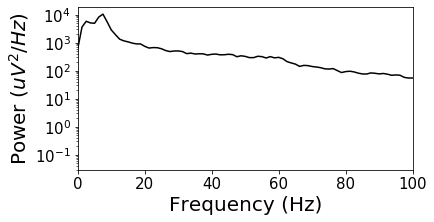

In [61]:
# Plot the power spectrum
plt.figure(figsize=(6,3))
plt.semilogy(f,psd,'k')
plt.xlim((0,100))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Power ($uV^{2}/Hz$)',size=20)
plt.xlabel('Frequency (Hz)',size=20)

# 3. Calculate and plot the time-frequency profile ("spectrogram")

In [52]:
window = [10, 20]
idx = np.where(np.logical_and(t>=window[0],t<window[1]))[0]

f, t_spec, x_spec = sp.signal.spectrogram(v[idx], fs=Fs, window='hanning', nperseg=1000, noverlap=1000-1, mode='psd')
t_spec = t_spec + t[idx[0]]

Text(0, 0.5, 'Voltage (a.u.)')

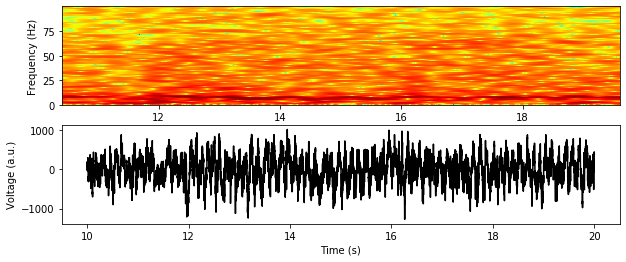

In [53]:
# Plot spectrogram
from matplotlib import cm
fmax = 100

x_mesh, y_mesh = np.meshgrid(t_spec, f[f<fmax])
plt.figure(figsize=(10,4))
plt.subplot(2,1,1)
plt.pcolormesh(x_mesh, y_mesh, np.log10(x_spec[f<fmax]), cmap=cm.jet)#, vmin=vmin, vmax=vmax)
plt.ylabel('Frequency (Hz)')
# plt.colorbar()

plt.subplot(2,1,2)
plt.plot(t[idx],v[idx],'k')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (a.u.)')